In [166]:
import matplotlib.pyplot as plt

In [167]:
def draw_line(x1, y1, x2, y2):
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    is_steep = abs(y2 - y1) > abs(x2 - x1)
    
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    p = 2 * dy - dx
    
    x_values = []
    y_values = []
    x = x1
    y = y1
    
    while True:
        if is_steep:
            x_values.append(y)
            y_values.append(x)
        else:
            x_values.append(x)
            y_values.append(y)
        
        if x == x2 and y == y2:
            break
            
        if p < 0:
            p += 2 * dy
        else:
            y += sy
            p += 2 * dy - 2 * dx
        
        x += sx
        
    return x_values, y_values

In [168]:
def eight_way_symmetric_plot(cx, cy, x, y):
    points = []
    points.append((x + cx, y + cy))
    points.append((x + cx, -y + cy))
    points.append((-x + cx, -y + cy))
    points.append((-x + cx, y + cy))
    
    points.append((y + cx, x + cy))
    points.append((y + cx, -x + cy))
    points.append((-y + cx, -x + cy))
    points.append((-y + cx, x + cy))
    
    pointX, pointY = zip(*points)
    
    pointX = list(pointX)
    pointY = list(pointY)
    
    return pointX, pointY


def circle_drawing(cx, cy, r):
    
    x = 0
    y = r 
    p = 3 - 2 * r
    
    x_values = []
    y_values = []
    
    pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
    
    x_values.append(pointX)
    y_values.append(pointY)
    
    while x <= y:
        
        print(f"p : {p}")
        
        x += 1
        
        if p < 0:
            p += 4 * x + 6
        else:
            y -= 1
            p += 4 * (x - y) + 10
            
        pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
        
        x_values.append(pointX)
        y_values.append(pointY)
        
    
    return x_values, y_values

## Base Line

In [169]:
# baseline
baseLineX1, baseLineY1 = draw_line(-35, -30, 35, -30)
baseLineX2, baseLineY2 = draw_line(-40, -25, 40, -25)
baseLineX3, baseLineY3 = draw_line(-45, -20, 45, -20)

baseLeftX, baseLeftY = draw_line(-45, -20, -35, -30)
baseRightX, baseRightY = draw_line(45, -20, 35, -30)

In [170]:
def draw_baseLine():
    plt.plot(baseLineX1, baseLineY1, color = 'black')
    plt.plot(baseLineX2, baseLineY2, color = 'black')
    plt.plot(baseLineX3, baseLineY3, color = 'black')
    plt.plot(baseLeftX, baseLeftY, color = 'black')
    plt.plot(baseRightX, baseRightY, color = 'black')

## Left Side

In [171]:
# left
leftLineX1, leftLineY1 = draw_line(-30, 15, -30, -20)
leftLineX2, leftLineY2 = draw_line(-20, 15, -20, -20)
leftTopX, leftTopY = draw_line(-30, 15, -20, 15)

In [172]:
def draw_left():
    plt.plot(leftLineX1, leftLineY1, color = 'black')
    plt.plot(leftLineX2, leftLineY2, color = 'black')
    plt.plot(leftTopX, leftTopY, color = 'black')

## Right Side

In [173]:
# right
rightLineX1, rightLineY1 = draw_line(20, 15, 20, -20)
rightLineX2, rightLineY2 = draw_line(30, 15, 30, -20)
rightTopX, rightTopY = draw_line(20, 15, 30, 15)

In [174]:
def draw_right():
    plt.plot(rightLineX1, rightLineY1, color = 'black')
    plt.plot(rightLineX2, rightLineY2, color = 'black')
    plt.plot(rightTopX, rightTopY, color = 'black')

## Circle

In [175]:
circleX, circleY = circle_drawing(0, 0, 5)

p : -7
p : 3
p : 5
p : 15


In [176]:
def draw_circle():
    plt.plot(circleX, circleY, color = 'red')

## Center

In [177]:
centerLineX1, centerLineY1 = draw_line(-10, 15, -10, -20)
centerLineX2, centerLineY2 = draw_line(10, 15, 10, -20)
centerLineX3, centerLineY3 = draw_line(0, -5, 0, -20)
centerLineX4, centerLineY4 = draw_line(0, 15, 0, 5)

angelX1, angelY1 = draw_line(0, 25, -10, 15)
angelX2, angelY2 = draw_line(10, 25, 0, 15)
angelX3, angelY3 = draw_line(20, 25, 10, 15)

topX, topY = draw_line(0, 25, 20, 25)

In [178]:
def draw_center():
    plt.plot(centerLineX1, centerLineY1, color = 'black')
    plt.plot(centerLineX2, centerLineY2, color = 'black')
    plt.plot(centerLineX3, centerLineY3, color = 'black')
    plt.plot(centerLineX4, centerLineY4, color = 'black')
    
    plt.plot(angelX1, angelY1, color = 'black')
    plt.plot(angelX2, angelY2, color = 'black')
    plt.plot(angelX3, angelY3, color = 'black')
    
    plt.plot(topX, topY, color = 'black')
    
    draw_circle()

In [179]:
def plot_func():
    draw_baseLine()
    draw_left()
    draw_right()
    draw_center()
    plt.title("Practice")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")

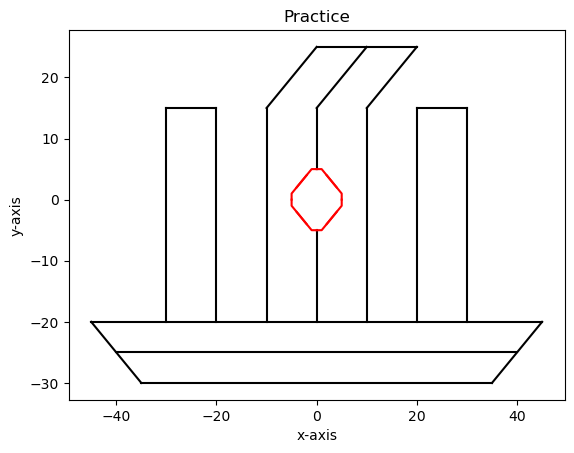

In [180]:
plot_func()